Breast Cancer Gene Expression Profiles (METABRIC) - Multiclass classification

In [2]:
pip install pycaret

In [3]:
pip install pycaret[mlops]

In [4]:
pip install gradio

In [5]:
from google.colab import files
uploaded = files.upload()

Saving mutation.csv to mutation.csv


In [6]:
import pandas as pd
data = pd.read_csv('mutation.csv')
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,4ER+,Right,10,NaN,6.044,IDC,140.500000,1,Negative,1
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4ER+,Right,0,2.0,4.020,IDC,84.633333,1,Positive,1
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,3,Right,1,2.0,4.030,IDC,163.700000,0,Positive,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,9,Right,3,1.0,4.050,MDLC,164.933333,1,Positive,1
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,9,Right,8,2.0,6.080,MDLC,41.366667,0,Positive,1


In [7]:
data.dropna(inplace=True)

In [8]:
from pycaret.classification import *
# Setup
clf1 = setup(data, target='her2_status_measured_by_snp6', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,8992
1,Target,her2_status_measured_by_snp6
2,Target type,Multiclass
3,Target mapping,"GAIN: 0, LOSS: 1, NEUTRAL: 2, UNDEF: 3"
4,Original data shape,"(1604, 27)"
5,Transformed data shape,"(1604, 59)"
6,Transformed train set shape,"(1122, 59)"
7,Transformed test set shape,"(482, 59)"
8,Ordinal features,7
9,Numeric features,12


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8512,0.1425,0.8512,0.8193,0.8167,0.5462,0.6057,0.9040
ridge,Ridge Classifier,0.8476,0.0000,0.8476,0.8180,0.8115,0.5297,0.5962,0.3410
et,Extra Trees Classifier,0.8396,0.1420,0.8396,0.8108,0.8095,0.5245,0.5688,0.7150
gbc,Gradient Boosting Classifier,0.8378,0.1456,0.8378,0.8066,0.8075,0.5195,0.5621,2.2140
lightgbm,Light Gradient Boosting Machine,0.8351,0.1412,0.8351,0.7974,0.8012,0.5045,0.5526,0.6220
lda,Linear Discriminant Analysis,0.8316,0.1465,0.8316,0.8277,0.8079,0.5080,0.5503,0.3330
lr,Logistic Regression,0.8307,0.1460,0.8307,0.7886,0.7956,0.4920,0.5376,1.1200
dummy,Dummy Classifier,0.7344,0.1000,0.7344,0.5394,0.6220,0.0000,0.0000,0.4060
dt,Decision Tree Classifier,0.7255,0.1335,0.7255,0.7431,0.7325,0.3697,0.3719,0.5680
knn,K Neighbors Classifier,0.6899,0.1175,0.6899,0.6134,0.6418,0.0654,0.0720,0.3440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
lr_multiclass = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7876,0.6430,0.7876,0.7429,0.7402,0.3451,0.4093
1,0.8230,0.8168,0.8230,0.7686,0.7894,0.5030,0.5306
2,0.8036,0.0000,0.8036,0.7743,0.7580,0.3746,0.4528
3,0.8393,0.0000,0.8393,0.8146,0.8026,0.5030,0.5770
4,0.8750,0.0000,0.8750,0.8295,0.8486,0.6531,0.6743
5,0.8125,0.0000,0.8125,0.7601,0.7790,0.4588,0.4862
6,0.8125,0.0000,0.8125,0.7663,0.7772,0.4247,0.4645
7,0.8661,0.0000,0.8661,0.8330,0.8351,0.5890,0.6443
8,0.8571,0.0000,0.8571,0.8127,0.8264,0.5741,0.6110


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

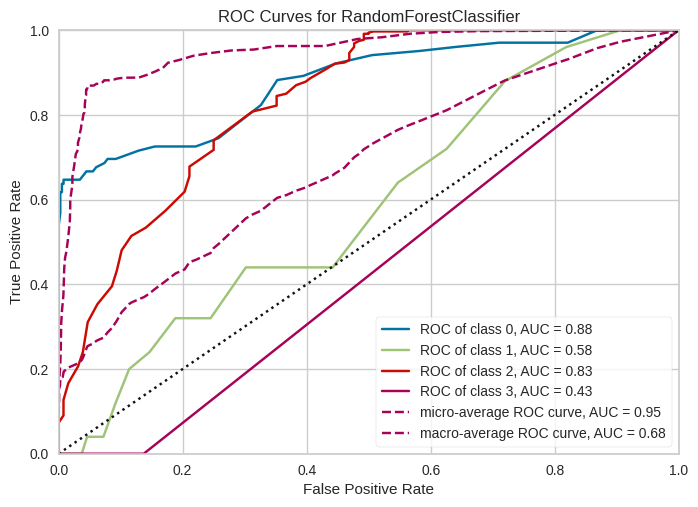

In [12]:
plot_model(best_model, plot = 'auc')

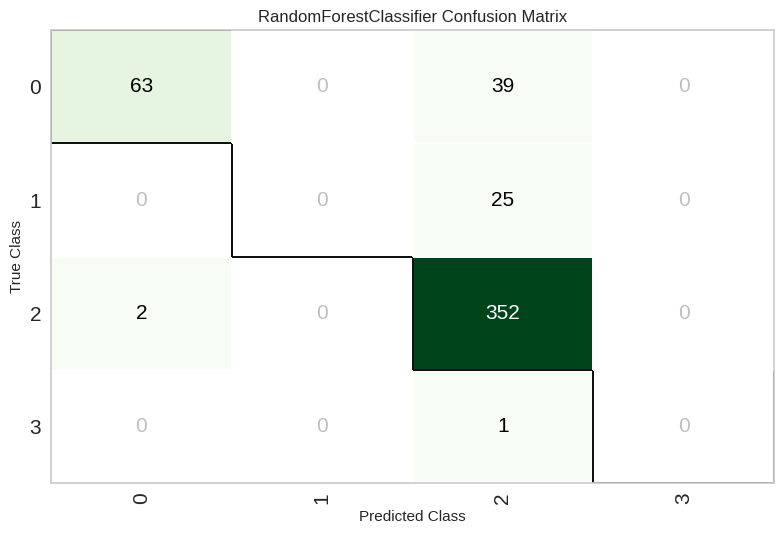

In [13]:
plot_model(best_model, plot = 'confusion_matrix')

In [14]:
predict = predict_model(best_model)
predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8610,0,0.8610,0.8251,0.8303,0.5864,0.6347


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,her2_status_measured_by_snp6,prediction_label,prediction_score
834,4329,70.750000,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,3,Positve,...,5.0,5.058,IDC,168.266663,0,Positive,0,2,NEUTRAL,0.72
1167,5134,46.580002,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,3,Positve,...,7.0,3.020,IDC,196.533340,1,Positive,1,2,NEUTRAL,0.93
1041,4894,47.709999,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,3,Positve,...,4.0,4.070,IDC,232.399994,1,Positive,0,2,NEUTRAL,0.92
538,2791,40.790001,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,2,Positve,...,12.0,3.034,IDC,271.933319,1,Positive,1,2,NEUTRAL,0.75
1367,5441,90.080002,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,Her2,3,Negative,...,12.0,4.070,IDC,9.700000,0,Negative,0,0,GAIN,0.68


In [15]:
# create new data by dropping 'her2_status_measured_by_snp6' column
new_data = data.copy()
new_data.drop('her2_status_measured_by_snp6', axis= 1, inplace = True)
new_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4ER+,Right,0,2.0,4.020,IDC,84.633333,1,Positive,1
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,3,Right,1,2.0,4.030,IDC,163.700000,0,Positive,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,9,Right,3,1.0,4.050,MDLC,164.933333,1,Positive,1
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,9,Right,8,2.0,6.080,MDLC,41.366667,0,Positive,1
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,7,Left,0,4.0,4.062,IDC,7.800000,0,Positive,1


In [16]:
predict = predict_model(best_model, data = new_data)
predict.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,prediction_label,prediction_score
1,2,43.189999,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,2.0,4.020,IDC,84.633331,1,Positive,1,NEUTRAL,0.87
2,5,48.869999,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,1,2.0,4.030,IDC,163.699997,0,Positive,0,NEUTRAL,0.62
3,6,47.680000,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,3,1.0,4.050,MDLC,164.933334,1,Positive,1,NEUTRAL,0.55
4,8,76.970001,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,8,2.0,6.080,MDLC,41.366665,0,Positive,1,NEUTRAL,0.83
5,10,78.769997,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,4.0,4.062,IDC,7.800000,0,Positive,1,NEUTRAL,0.89


In [17]:
saved_model = save_model(best_model, 'Mutation_Multiclass_Binary_Classification')

Transformation Pipeline and Model Successfully Saved


In [18]:
load_model = load_model('Mutation_Multiclass_Binary_Classification')
load_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['patient_id', 'age_at_diagnosis',
                                             'chemotherapy', 'cohort',
                                             'neoplasm_histologic_grade',
                                             'hormone_therapy',
                                             'lymph_nodes_examined_posit...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=8992,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [19]:
create_app(load_model)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>